In [22]:
import os
import matplotlib.pyplot as mp
import numpy as np
import pandas as pd

In [41]:
scriptoutputs = [f for f in os.listdir() if f.startswith("startup_script_")]
scriptoutputs.sort()
filename = scriptoutputs[-1]
filename

'startup_script_20190527150002'

In [42]:
alldata = pd.read_csv(filename, sep=" ", header=None, names=["program", "real", "user", "kernel"])
alldata

,program,real,user,kernel
0,bash,0.013,0.013,0.000
1,bash,0.006,0.006,0.000
2,bash,0.005,0.004,0.000
3,bash,0.004,0.000,0.004
4,bash,0.003,0.003,0.000
5,bash,0.003,0.003,0.000
6,bash,0.003,0.003,0.000
7,bash,0.003,0.002,0.000
8,bash,0.003,0.002,0.000
9,bash,0.003,0.002,0.000


In [43]:
data = alldata.groupby("program").mean()
data["on_proc"] = data["user"] + data["kernel"]
data

,real,user,kernel,on_proc
program,,,,
bash,0.0046,0.0038,0.0004,0.0042
deno,0.0095,0.0066,0.0029,0.0095
lua,0.0010,0.0007,0.0003,0.0010
node,0.0504,0.0454,0.0056,0.0510
perl,0.0011,0.0009,0.0002,0.0011
perl6,0.1131,0.1430,0.0234,0.1664
python2,0.0331,0.0293,0.0034,0.0327
python3,0.0116,0.0101,0.0017,0.0118
ruby,0.0509,0.0471,0.0035,0.0506


([<matplotlib.axis.XTick at 0x7ff71ad99a58>,
 <a list of 10 Text xticklabel objects>)

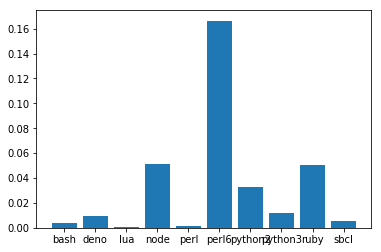

In [44]:
x = np.arange(len(data))
mp.bar(x, data["on_proc"])
mp.xticks(x, data.index)

([<matplotlib.axis.XTick at 0x7ff71acbfdd8>,
 <a list of 9 Text xticklabel objects>)

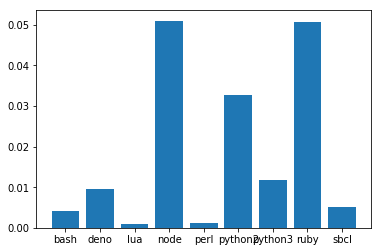

In [46]:
data2 = data.drop("perl6")
x2 = np.arange(len(data2))
mp.bar(x2, data2["on_proc"])
mp.xticks(x2, data2.index)